# #1

In [25]:
import nltk

nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [26]:
from nltk.tokenize import word_tokenize

lost = nltk.corpus.gutenberg.words("milton-paradise.txt")
lost


['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [27]:
text_sentences = nltk.corpus.gutenberg.sents("milton-paradise.txt")
print(text_sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [28]:
sw = set(nltk.corpus.stopwords.words("english"))
stop_words = ["thus", "thou", "thee", "thy"]
for stop_word in sw:
    stop_words.append(stop_word)

In [29]:
filtered_list = []
for sentence in text_sentences:
    for word in sentence:
        if word.lower() not in stop_words and word.isalnum():
            if len(word) > 2:
                filtered_list.append(word)
print(filtered_list)

['Paradise', 'Lost', 'John', 'Milton', '1667', 'Book', 'Man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', 'woe', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'regain', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', 'Sion', 'hill', 'Delight', 'Siloa', 'brook', 'flowed', 'Fast', 'oracle', 'God', 'thence', 'Invoke', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'Aonian', 'mount', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme', 'chiefly', 'Spirit', 'dost', 'prefer', 'temples', 'upright', 'heart', 'pure', 'Instruct', 'know', 'first', 'Wast', 'present', 'mighty', 'wings', 'outspread', 'Dove', 'like', 'sat', 'brooding', 'vast', 'Abyss', 'mad', 'pregnant', 'dark', 'Illumine', 'low', 'raise', 'support', 'height', 'great', 'arg

In [30]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for word in filtered_list:
    lemmatizer.lemmatize(word)
print(filtered_list)

['Paradise', 'Lost', 'John', 'Milton', '1667', 'Book', 'Man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', 'woe', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'regain', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', 'Sion', 'hill', 'Delight', 'Siloa', 'brook', 'flowed', 'Fast', 'oracle', 'God', 'thence', 'Invoke', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'Aonian', 'mount', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme', 'chiefly', 'Spirit', 'dost', 'prefer', 'temples', 'upright', 'heart', 'pure', 'Instruct', 'know', 'first', 'Wast', 'present', 'mighty', 'wings', 'outspread', 'Dove', 'like', 'sat', 'brooding', 'vast', 'Abyss', 'mad', 'pregnant', 'dark', 'Illumine', 'low', 'raise', 'support', 'height', 'great', 'arg

In [31]:
from nltk.probability import FreqDist

fdist = FreqDist(filtered_list)
top_words = fdist.most_common(20)
top_words

[('Heaven', 412),
 ('God', 258),
 ('shall', 241),
 ('yet', 165),
 ('though', 161),
 ('first', 156),
 ('Man', 135),
 ('high', 128),
 ('Hell', 117),
 ('day', 117),
 ('may', 116),
 ('Earth', 115),
 ('one', 114),
 ('great', 113),
 ('far', 104),
 ('earth', 102),
 ('Adam', 102),
 ('good', 100),
 ('things', 99),
 ('like', 98)]

In [46]:
def common_words(num):
    top_words = fdist.most_common(num)
    return top_words
common_words(15)

[('Heaven', 412),
 ('God', 258),
 ('shall', 241),
 ('yet', 165),
 ('though', 161),
 ('first', 156),
 ('Man', 135),
 ('high', 128),
 ('Hell', 117),
 ('day', 117),
 ('may', 116),
 ('Earth', 115),
 ('one', 114),
 ('great', 113),
 ('far', 104)]

Text(0, 0.5, 'Common Words')

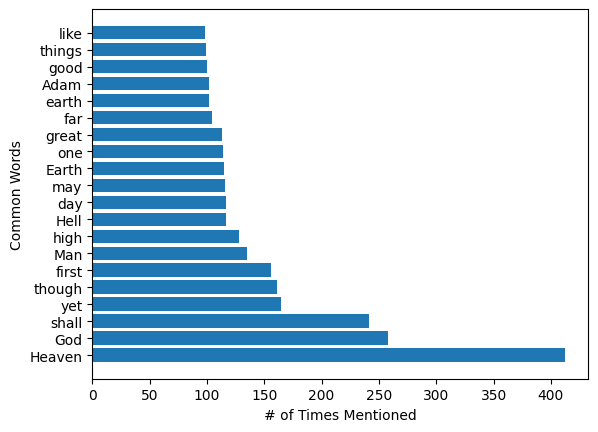

In [37]:
from matplotlib import pyplot as plt

x = [word[0] for word in top_words]
y = [word[1] for word in top_words]

plt.barh(x, y)
plt.xlabel("# of Times Mentioned")
plt.ylabel("Common Words")

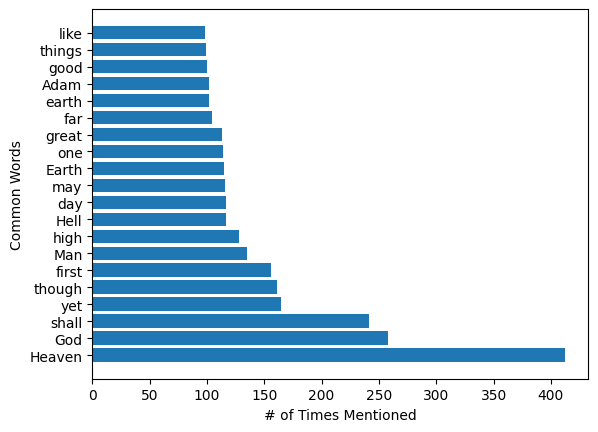

In [47]:
def plot_bar(list, xlabel, ylabel):
    x = [word[0] for word in list]
    y = [word[1] for word in list]

    plt.barh(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
plot_bar(top_words, "# of Times Mentioned", "Common Words")

I chose lemmitization because lemmitization finds words that are related to each to the dictionary word. It also thinks about the context the word is used, which it doesn't do in stemming.

# #2

In [33]:
sentences = []
for sentence in text_sentences:
    joined = " ".join(sentence)
    sentences.append(joined)
sentences

['[ Paradise Lost by John Milton 1667 ]',
 'Book I',
 "Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .",
 "And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me , for thou know ' st ; thou from the first Wast present , and , with mighty wings outspread , Dove - like sat ' st brooding on the vast Aby

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []

for sentence in sentences:
    sentiment = analyzer.polarity_scores(sentence)
    sentiment_scores.append((sentence, sentiment["compound"]))

positive = sorted(sentiment_scores, key = lambda x: x[1], reverse = True)[:5]
negative = sorted(sentiment_scores, key = lambda x: x[1])[:5]
neutral = sorted(sentiment_scores, key = lambda x: abs(x[1]))[:5]

positive

[("Round he surveys ( and well might , where he stood So high above the circling canopy Of night ' s extended shade ,) from eastern point Of Libra to the fleecy star that bears Andromeda far off Atlantick seas Beyond the horizon ; then from pole to pole He views in breadth , and without longer pause Down right into the world ' s first region throws His flight precipitant , and winds with ease Through the pure marble air his oblique way Amongst innumerable stars , that shone Stars distant , but nigh hand seemed other worlds ; Or other worlds they seemed , or happy isles , Like those Hesperian gardens famed of old , Fortunate fields , and groves , and flowery vales , Thrice happy isles ; but who dwelt happy there He staid not to inquire : Above them all The golden sun , in splendour likest Heaven , Allured his eye ; thither his course he bends Through the calm firmament , ( but up or down , By center , or eccentrick , hard to tell , Or longitude ,) where the great luminary Aloof the vulg

In [35]:
negative

[("that now , While time was , our first parents had been warned The coming of their secret foe , and ' scaped , Haply so ' scaped his mortal snare : For now Satan , now first inflamed with rage , came down , The tempter ere the accuser of mankind , To wreak on innocent frail Man his loss Of that first battle , and his flight to Hell : Yet , not rejoicing in his speed , though bold Far off and fearless , nor with cause to boast , Begins his dire attempt ; which nigh the birth Now rolling boils in his tumultuous breast , And like a devilish engine back recoils Upon himself ; horrour and doubt distract His troubled thoughts , and from the bottom stir The Hell within him ; for within him Hell He brings , and round about him , nor from Hell One step , no more than from himself , can fly By change of place : Now conscience wakes despair , That slumbered ; wakes the bitter memory Of what he was , what is , and what must be Worse ; of worse deeds worse sufferings must ensue .",
  -0.9952),
 (

In [36]:
neutral

[('Book I', 0.0),
 ('Oh how unlike the place from whence they fell !', 0.0),
 ('What can it the avail though yet we feel Strength undiminished , or eternal being To undergo eternal punishment ?"',
  0.0),
 ('But see !', 0.0),
 ('Him , haply slumbering on the Norway foam , The pilot of some small night - foundered skiff , Deeming some island , oft , as seamen tell , With fixed anchor in his scaly rind , Moors by his side under the lee , while night Invests the sea , and wished morn delays .',
  0.0)]

# #3
For each of the positive, negative, and neutral rankings, they seem to be accurate. The most positive sentences have words that have a positive meaning like glorious, happy, sweetness, and other words or phrases that have positive meeting. The most negative sentences have words that have a negative connation like "seised by force", "rage", "warned about a secret foe", and more words. For the most neutral sentences, they have words that don't describe anything in a neutral way, or they are just talking about situation.

# Extra Credit


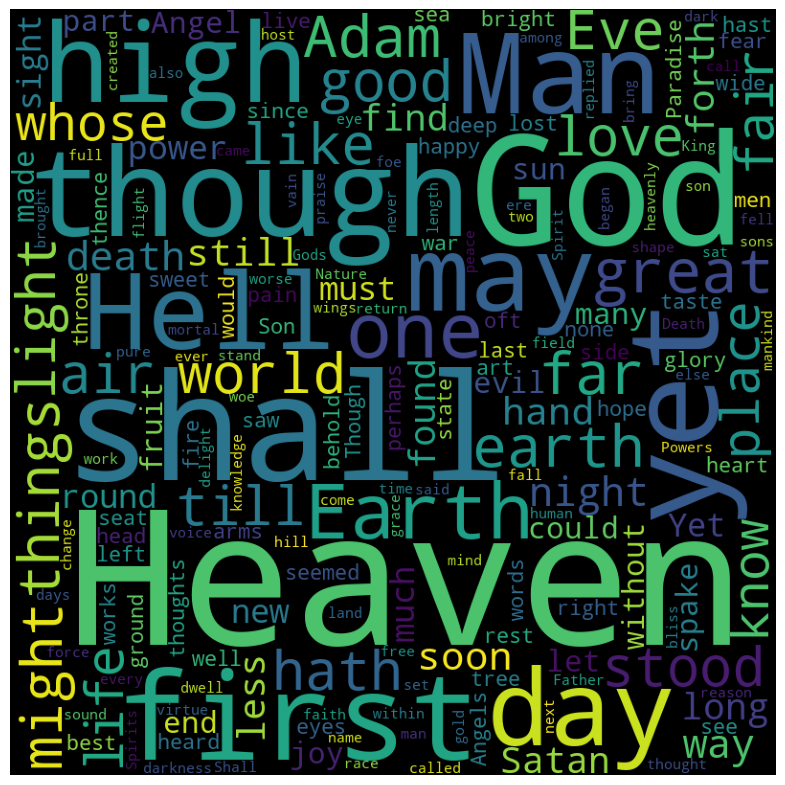

In [49]:
from wordcloud import WordCloud

def plot_wordcloud(w, h, list):
    wordcloud = WordCloud(width = w, height = h).generate_from_frequencies(list)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.tight_layout(pad = 0)
    plt.axis("off")
    plt.show()
plot_wordcloud(800, 800, fdist)